In [17]:
%pip install scikeras --quiet
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Download The dataset

In [ ]:
import os
# Validate if the dataset is already downloaded
if not os.path.exists("apple-quality/apple-quality.csv"):
    import zipfile
    if not os.path.exists("apple-quality.zip"):
        # Download the dataset from Kaggle
        # Make sure you have Kaggle API credentials set up in your environment
        os.system("kaggle datasets download -d nelgiriyewithana/apple-quality")

        # Unzip the downloaded dataset
        with zipfile.ZipFile("apple-quality.zip", 'r') as zip_ref:
            zip_ref.extractall("apple-quality")
    else:
        # If the zip file already exists, just extract it
        print("apple-quality.zip already exists. Skipping download.")
        with zipfile.ZipFile("apple-quality.zip", 'r') as zip_ref:
            zip_ref.extractall("apple-quality")
else:
    print("apple-quality/apple-quality.csv already exists.")

apple-quality.zip already exists. Skipping download.


## Load the Dataset

In [19]:
# LOAD THE DATASET
import pandas as pd
import numpy as np
import os

df = pd.read_csv("apple-quality/apple_quality.csv")  # Note: Changed from apple-quality.csv to apple_quality.csv
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [20]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Seems like there's some null values in the dataset

## EDA

Checking the Null value

In [21]:
# Check for missing values
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

The dataset has only one null value and it was shown in the last row when we used `df.tail()` so let's drop the last row which contains the null value

In [22]:
# Drop the last row which contains null values
df = df.dropna(subset=['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Quality'])

# Verify the null values are gone
null_counts = df.isnull().sum()
print("Null values after cleaning:")
print(null_counts)

# Check the shape of the dataframe after cleaning
print(f"\nDataframe shape after cleaning: {df.shape}")

# Display the first few rows to confirm the data looks good
print("\nFirst few rows of the cleaned dataframe:")
print(df.head())

# Display the last few rows to confirm the data looks good
print("\nLast few rows of the cleaned dataframe:")
print(df.tail())

Null values after cleaning:
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Dataframe shape after cleaning: (4000, 9)

First few rows of the cleaned dataframe:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  

Last few rows of the cleaned dataframe:
        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness

Now checking for the Unique values in the dataset

In [23]:
df.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality           2
dtype: int64

Except Quality all the other columns has all unique values

In [24]:
# Data Columns
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [25]:
# View unique values in each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in A_id: [0.000e+00 1.000e+00 2.000e+00 ... 3.997e+03 3.998e+03 3.999e+03]
Unique values in Size: [-3.97004852 -1.19521719 -0.29202386 ... -2.6345153  -4.00800374
  0.27853965]
Unique values in Weight: [-2.51233638 -2.83925653 -1.35128199 ... -2.13824672 -1.77933711
 -1.71550503]
Unique values in Sweetness: [ 5.34632961  3.66405876 -1.73842916 ... -2.44046129  2.36639697
  0.12121725]
Unique values in Crunchiness: [-1.01200871  1.58823231 -0.34261593 ...  0.65722289 -0.20032937
 -1.15407476]
Unique values in Juiciness: [1.84490036 0.8532858  2.83863551 ... 2.19970859 2.16143512 1.2666774 ]
Unique values in Ripeness: [ 0.3298398   0.86753008 -0.03803333 ...  4.76385918  0.21448838
 -0.77657147]
Unique values in Acidity: ['-0.491590483' '-0.722809367' '2.621636473' ... '-1.334611391'
 '-2.229719806' '1.599796456']
Unique values in Quality: ['good' 'bad']


In [26]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


The Acidity Column is catagorical value so let's change it it Numeric

In [27]:
# Change the Acidity column to a Numeric type
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
# Check for missing values again
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [28]:
# data description
df.describe().style.background_gradient(cmap = 'viridis', low = 0, high = 1, axis = 0)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


Now checking for the outlairs

In [29]:
# Finding the outlaiers of each column
outlair_columns = []

for column in df.select_dtypes(include=[np.number]).columns:
    # Calculate the IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")

Column: A_id
Number of outliers: 0
Column: Size
Number of outliers: 22
Column: Weight
Number of outliers: 54
Column: Sweetness
Number of outliers: 32
Column: Crunchiness
Number of outliers: 47
Column: Juiciness
Number of outliers: 32
Column: Ripeness
Number of outliers: 24
Column: Acidity
Number of outliers: 20


Now Treating the outlairs

Original DataFrame shape: (4000, 9)
Cleaned DataFrame shape: (4000, 9)


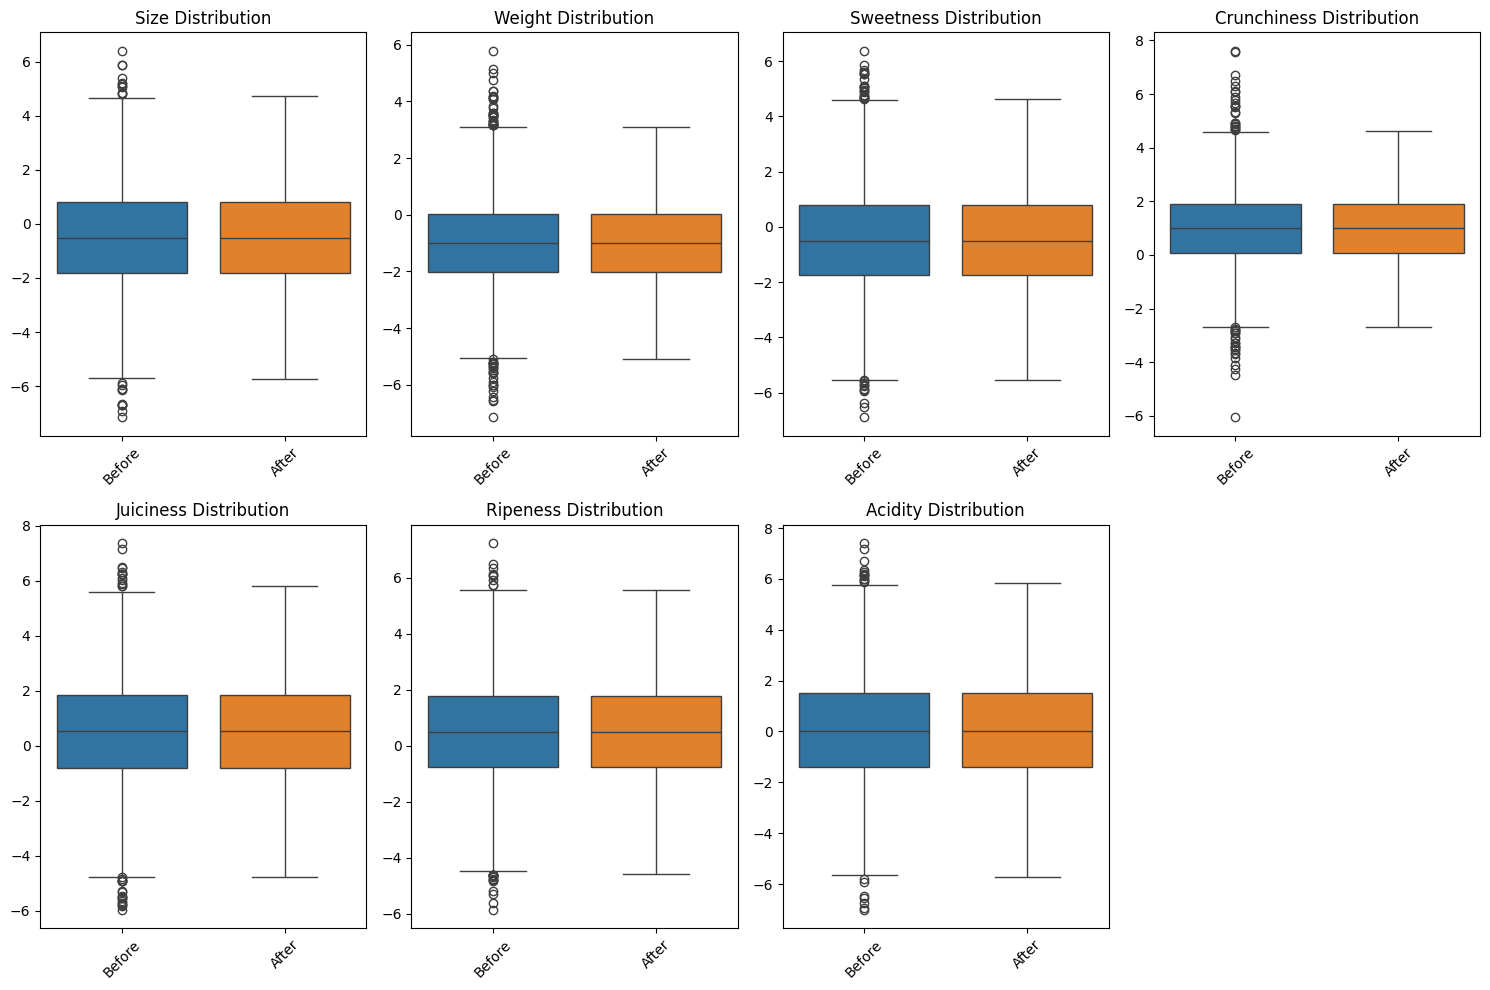

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the original dataframe to keep the original intact
df_cleaned = df.copy()

# Define a function to handle outliers using IQR method
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a copy to avoid modifying the original
    df_temp = data.copy()
    
    # Cap outliers at the bounds (less destructive)
    df_temp.loc[df_temp[column] < lower_bound, column] = lower_bound
    df_temp.loc[df_temp[column] > upper_bound, column] = upper_bound
    
    return df_temp

# Handle outliers for each numeric column (except A_id)
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
for column in numeric_cols:
    if column != 'A_id':  # Skip A_id as it has no outliers
        df_cleaned = handle_outliers(df_cleaned, column)

# Verify the results
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# Create box plots to visualize the effect of outlier treatment
plt.figure(figsize=(15, 10))

# Create subplots for key numeric columns before and after outlier treatment
subplot_idx = 1
for column in numeric_cols:
    if column != 'A_id':  # Skip A_id
        plt.subplot(2, 4, subplot_idx)
        
        # Create side-by-side boxplots
        plot_data = pd.DataFrame({
            'Before': df[column],
            'After': df_cleaned[column]
        })
        sns.boxplot(data=plot_data)
        plt.title(f'{column} Distribution')
        plt.xticks(rotation=45)
        
        subplot_idx += 1

plt.tight_layout()
plt.show()

In [31]:
# Finding the outlaiers of each column
outlair_columns = []

for column in df_cleaned.select_dtypes(include=[np.number]).columns:
    # Calculate the IQR for the column
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")

Column: A_id
Number of outliers: 0
Column: Size
Number of outliers: 0
Column: Weight
Number of outliers: 0
Column: Sweetness
Number of outliers: 0
Column: Crunchiness
Number of outliers: 0
Column: Juiciness
Number of outliers: 0
Column: Ripeness
Number of outliers: 0
Column: Acidity
Number of outliers: 0


## Data Exploration 

In [32]:
x_values = df_cleaned.select_dtypes(include=[np.number]).drop(columns=['A_id']).columns

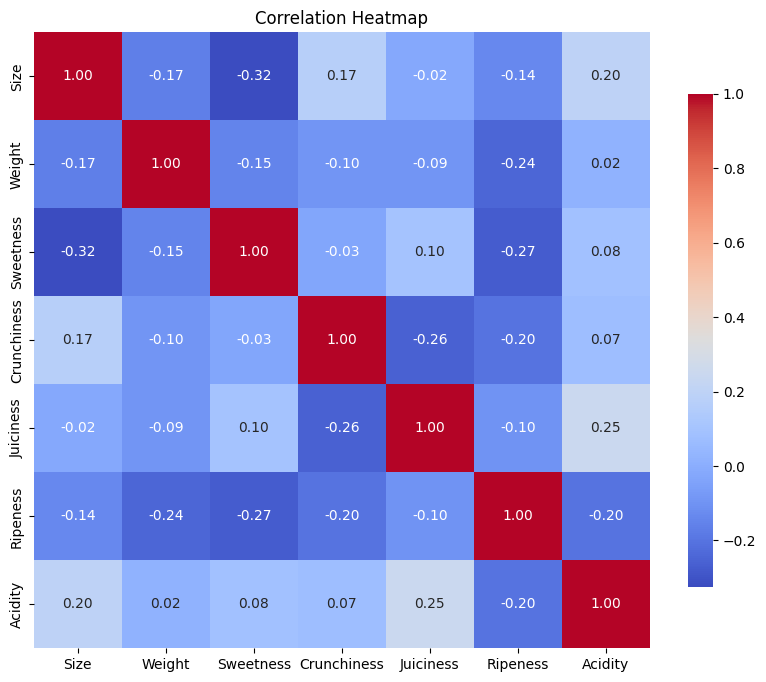

In [33]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
corr = df_cleaned[x_values].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


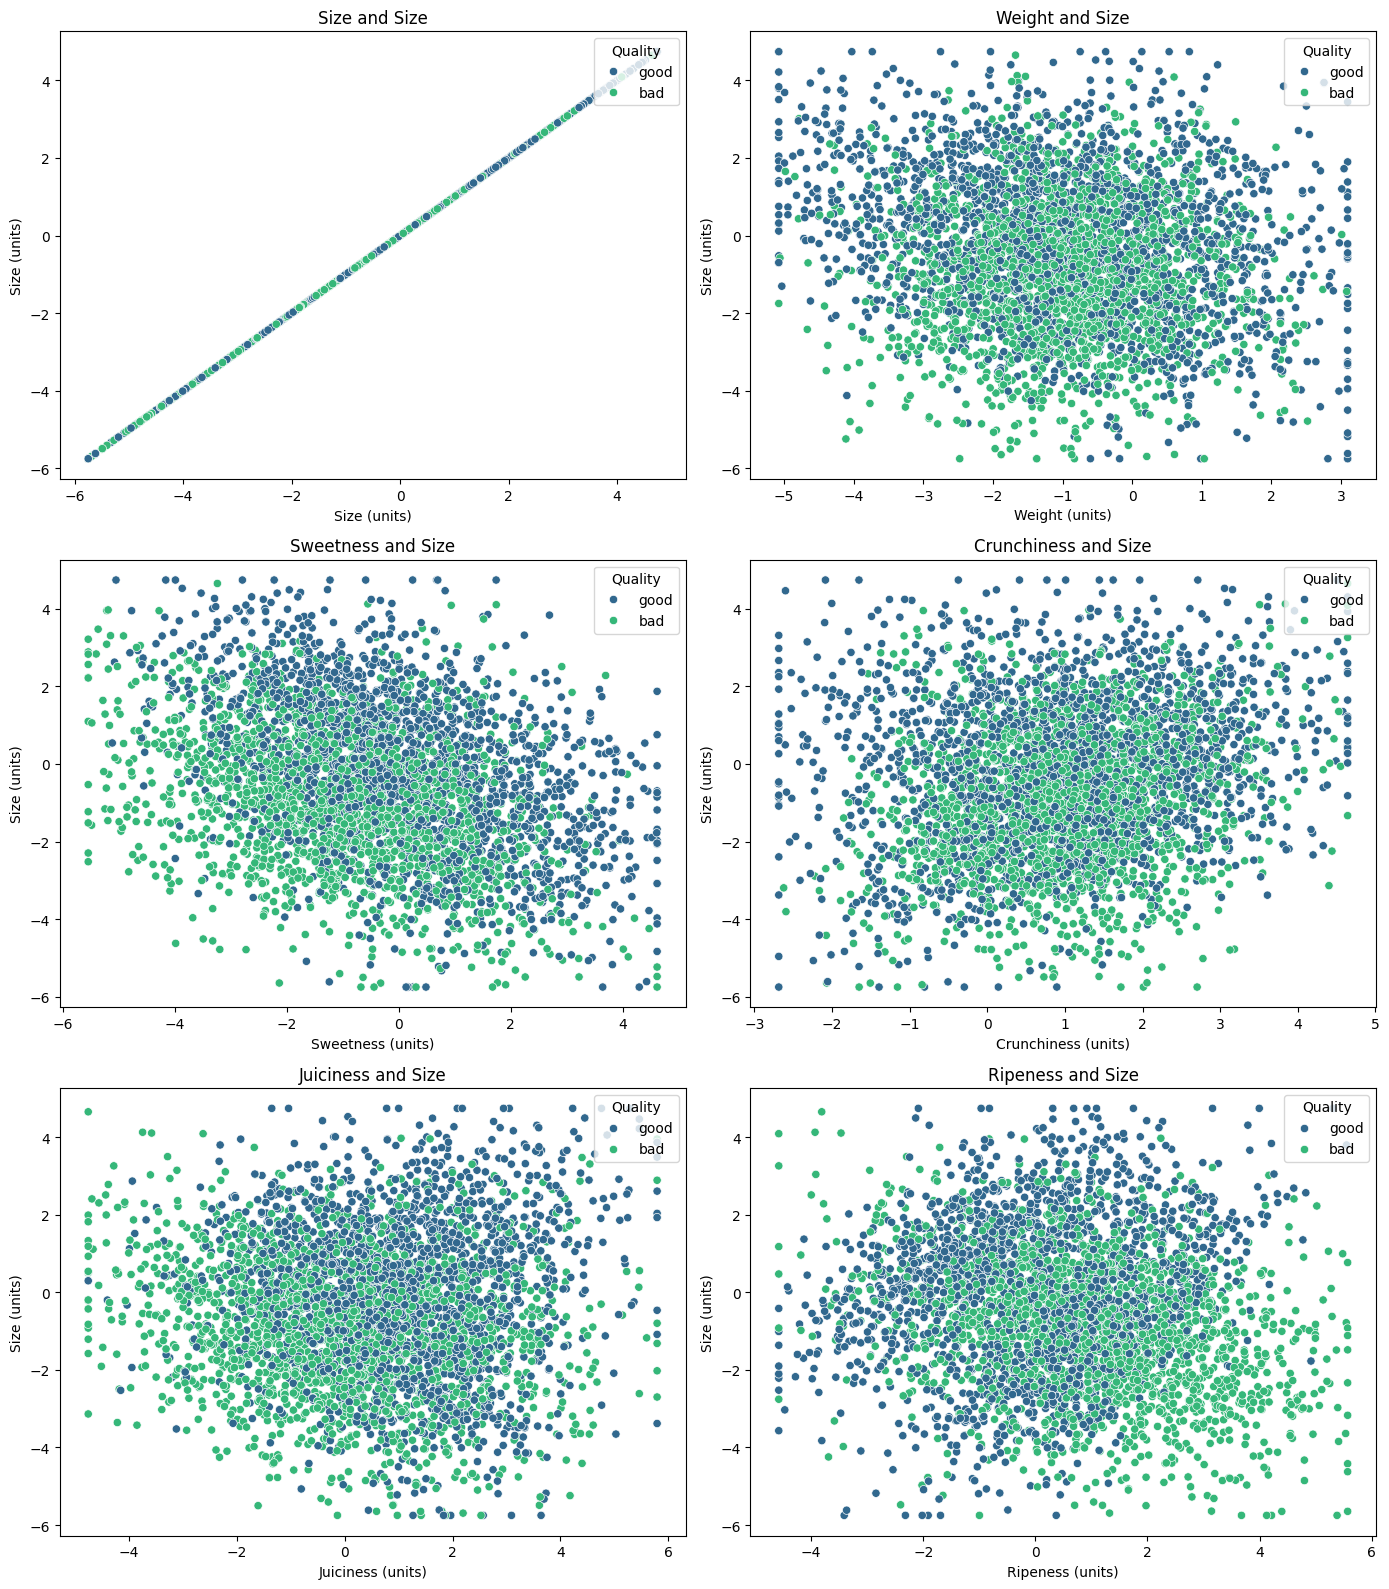

In [34]:
# Scatter plot of each column against the size
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
y_value = 'Size'

for ax, x_value in zip(axis.flat, x_values):
    sns.scatterplot(data=df_cleaned, x=x_value, y=y_value, hue='Quality', palette='viridis', ax=ax)
    ax.set_title(f'{x_value.capitalize()} and {y_value.capitalize()}')
    ax.set_xlabel(f'{x_value.capitalize()} (units)')
    ax.set_ylabel(f'{y_value.capitalize()} (units)')
    ax.legend(title='Quality', loc='upper right')
plt.tight_layout()
plt.show()

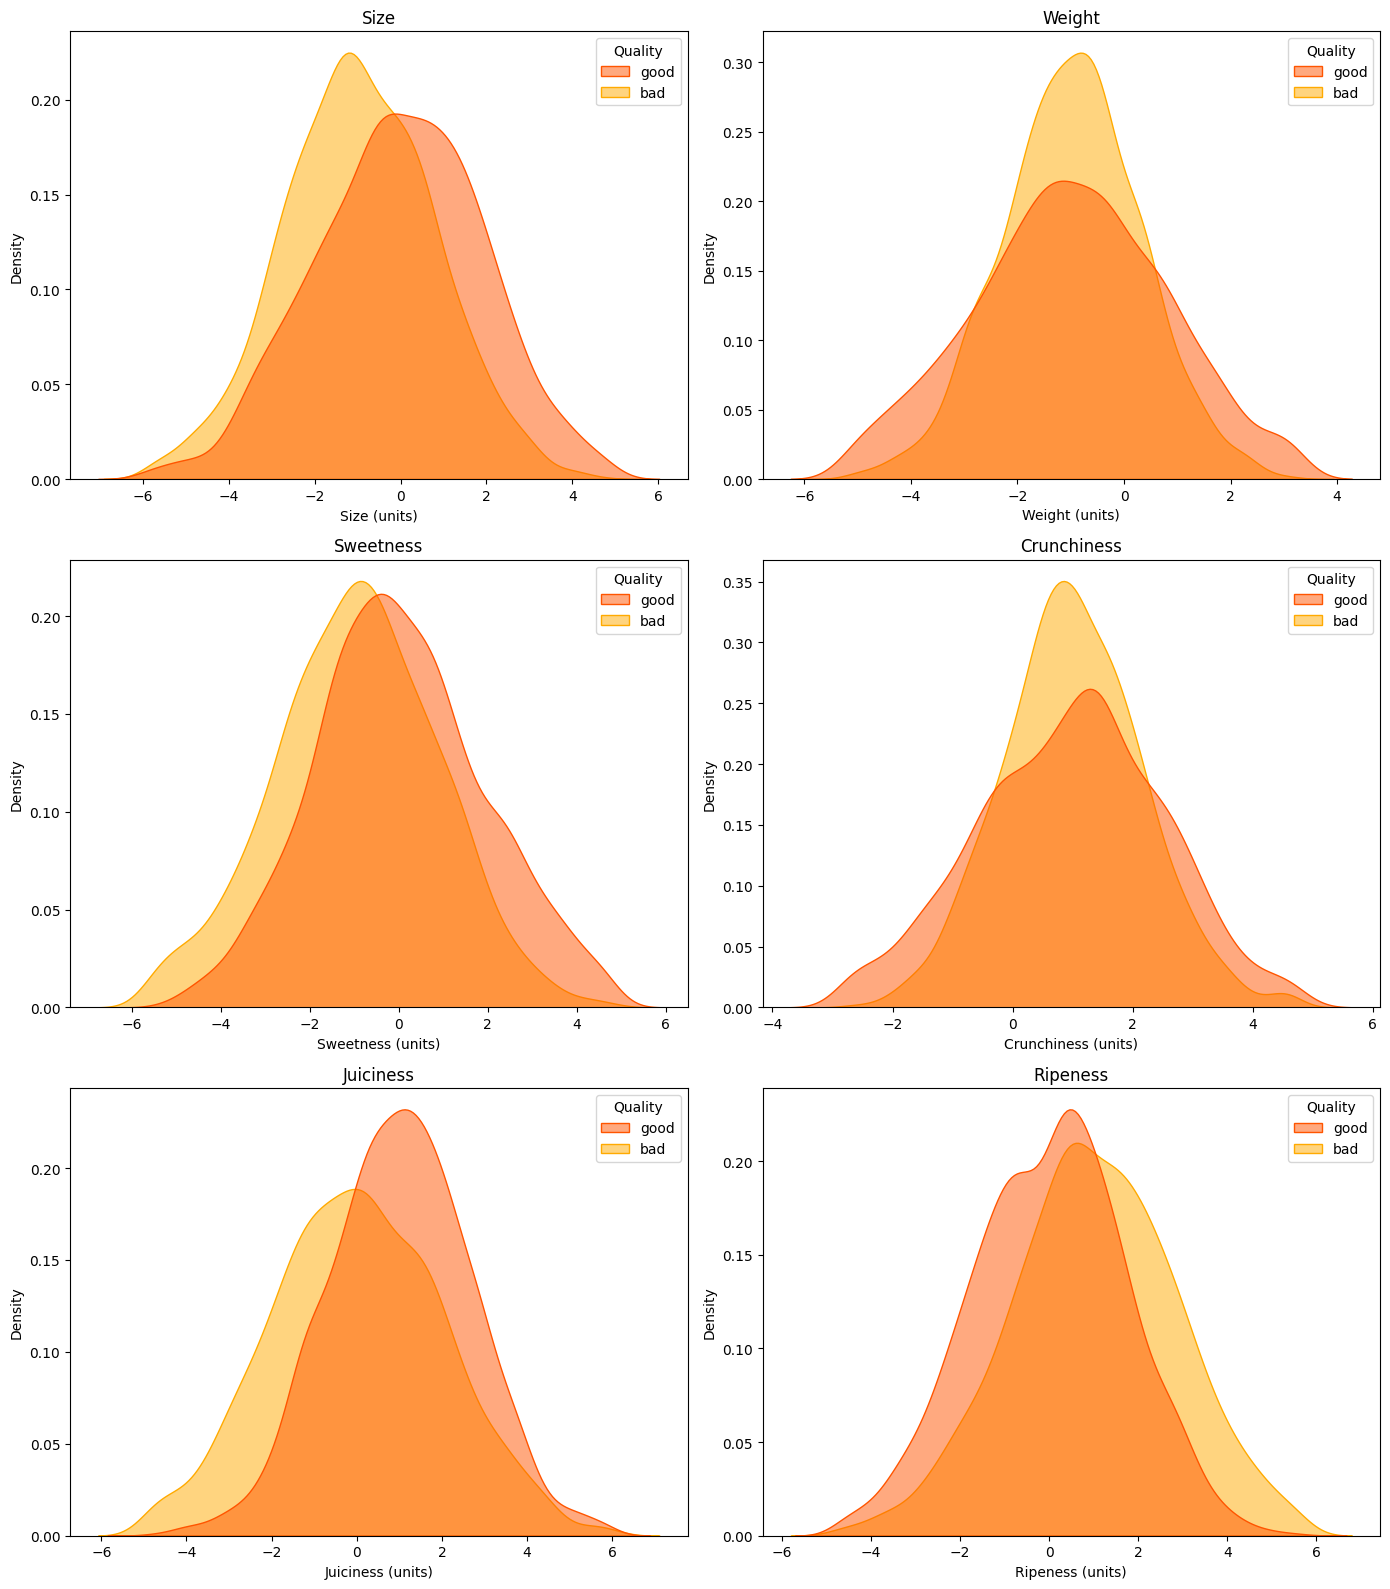

In [35]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

for ax, x_value in zip(axis.flat, x_values):
    sns.kdeplot(data=df_cleaned, x=x_value, fill=True, hue='Quality', common_norm=False, palette='autumn', alpha=0.5, ax=ax)
    ax.set_title(f'{x_value.capitalize()}')
    ax.set_xlabel(f'{x_value.capitalize()} (units)')
    ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

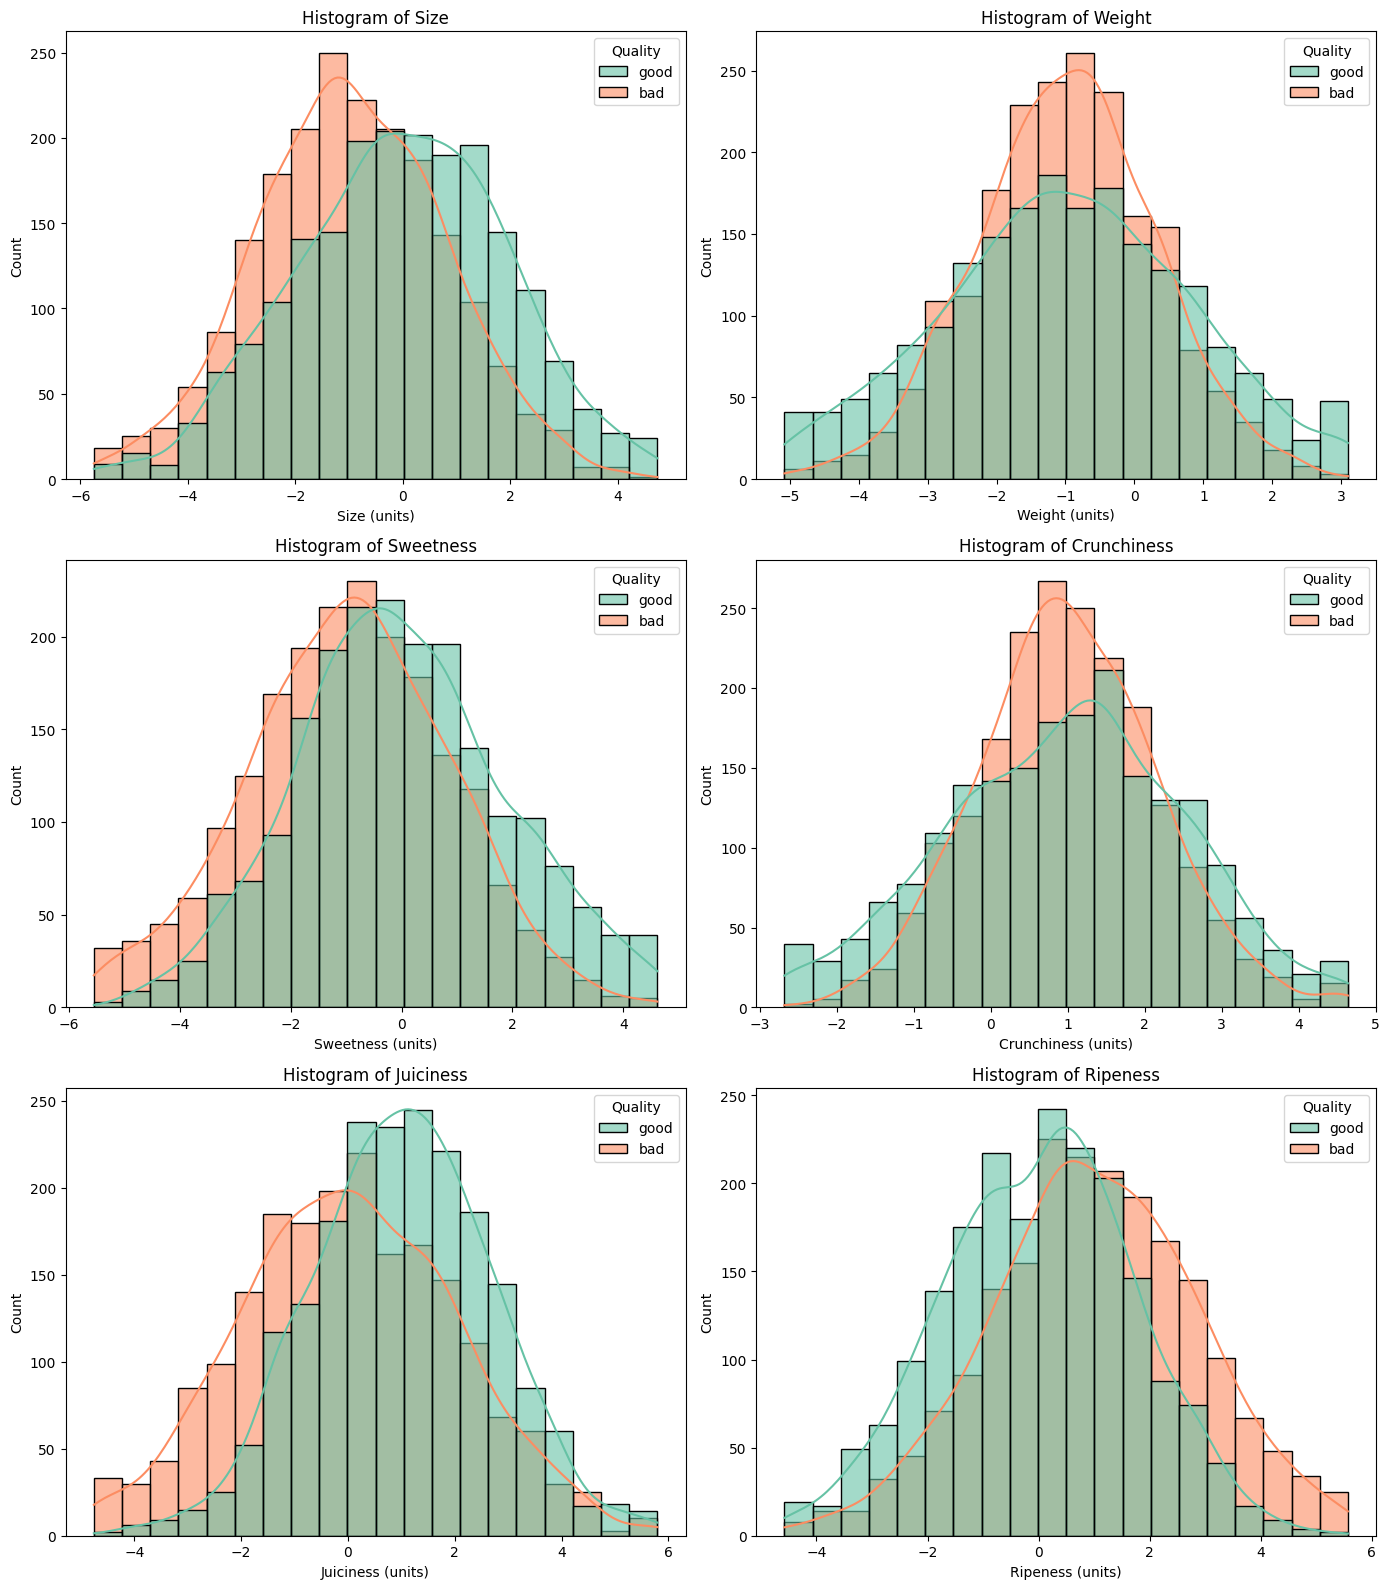

In [ ]:
# Histogram of each column
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

for ax, x_value in zip(axis.flat, x_values):
    sns.histplot(data=df_cleaned, x=x_value, hue="Quality", palette='Set2', kde=True, ax=ax, bins=20, alpha=0.6)
    ax.set_title(f'Histogram of {x_value.capitalize()}')
    ax.set_xlabel(f'{x_value.capitalize()} (units)')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

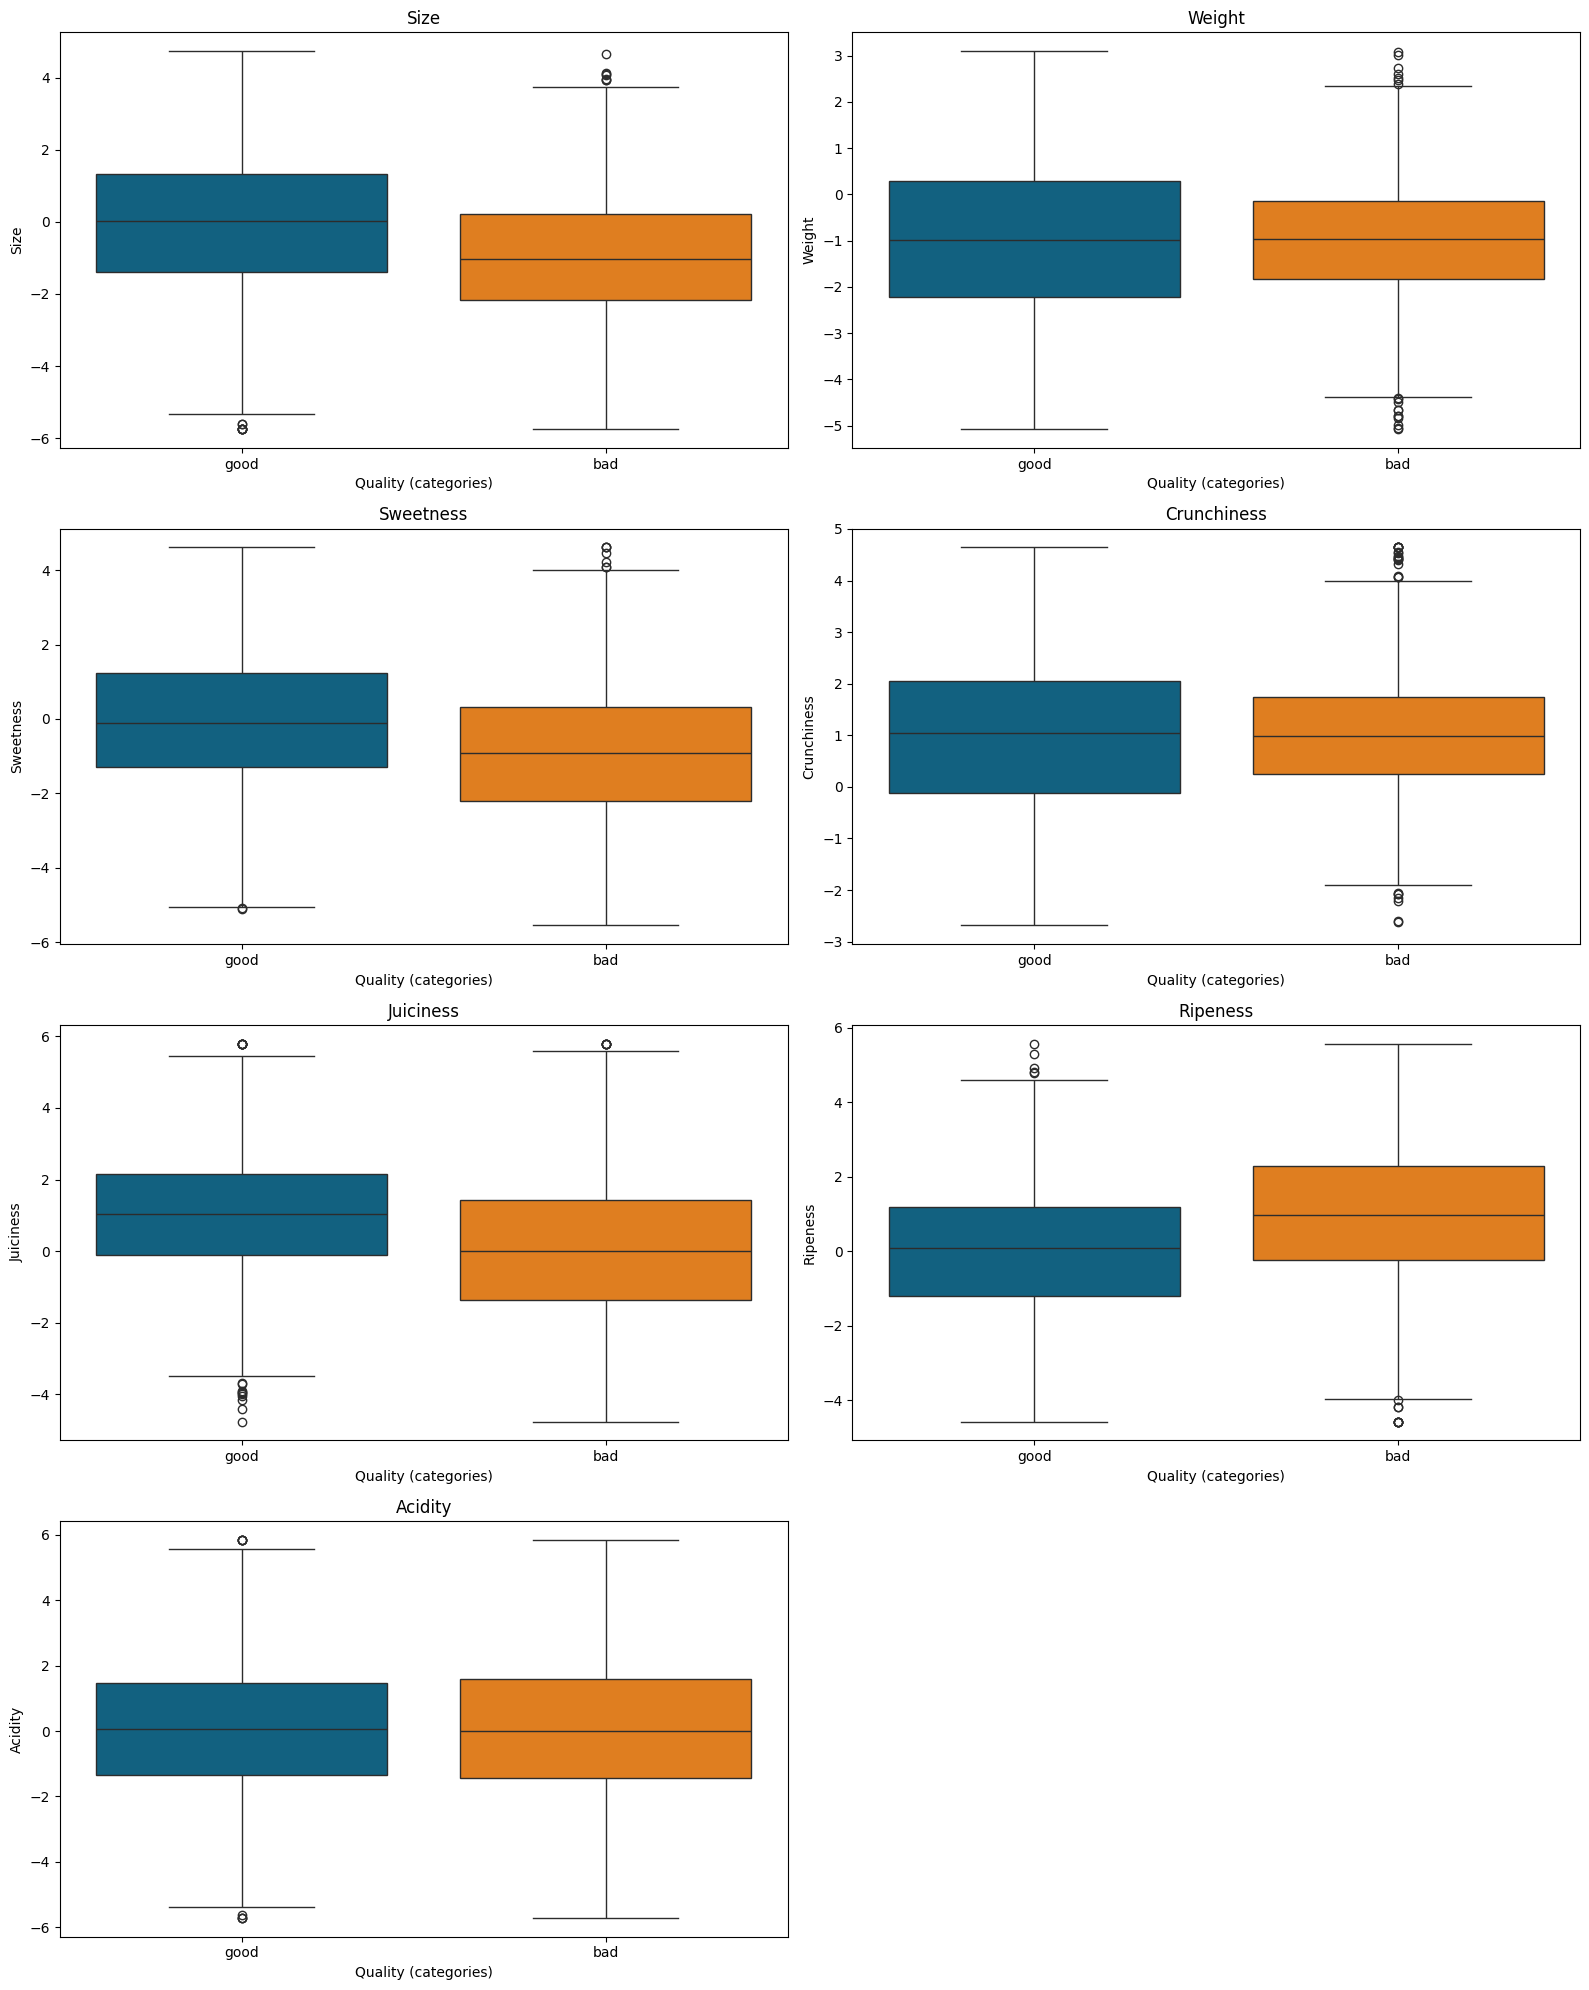

In [37]:
# Create a 4x2 grid to accommodate all 7 features (with one empty subplot)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

for i, x_value in enumerate(x_values):
    ax = axes.flatten()[i] 
    sns.boxplot(data=df_cleaned, x='Quality', y=x_value, hue='Quality', ax=ax, palette=["#006992", "#ff7d00"])
    ax.set_title(f'{x_value.capitalize()}')
    ax.set_ylabel(x_value.capitalize())
    ax.set_xlabel('Quality (categories)')

# Hide the last empty subplot
if len(x_values) < len(axes.flatten()):
    axes.flatten()[len(x_values)].set_visible(False)
    
plt.tight_layout()
plt.show()

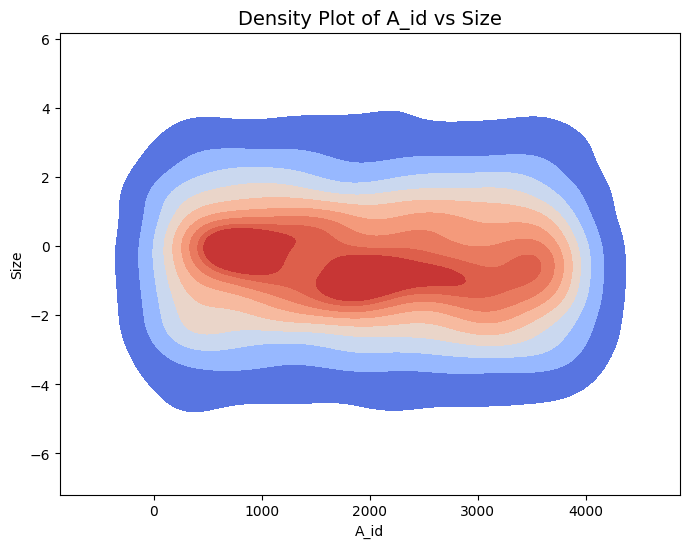

In [38]:
### 🔹 KDE Density Plots ###
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=df[numeric_cols[0]], y=df_cleaned[numeric_cols[1]], cmap="coolwarm", fill=True)
    plt.title(f"Density Plot of {numeric_cols[0]} vs {numeric_cols[1]}", fontsize=14)
    plt.show()

## Data PreProcessing

Unique values in y after mapping: [1 0]


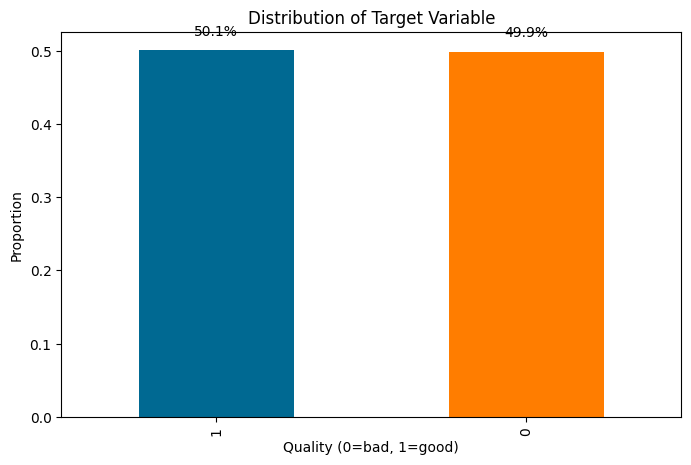

In [39]:
# split the data into features and target variable
X = df_cleaned.drop(columns=['Quality'])
y = df_cleaned['Quality']

# On the target variable, we will convert good to 1 and bad to 0
# Note: The values in the dataset are lowercase, not capitalized
y = y.map({'good': 1, 'bad': 0})

y = y.astype(int)

# Check the unique values in y
print("Unique values in y after mapping:", y.unique())

# Check the distribution of the target variable
plt.figure(figsize=(8, 5))
y_distribution = y.value_counts(normalize=True)
ax = y_distribution.plot(kind='bar', color=['#006992', '#ff7d00'])
plt.title('Distribution of Target Variable')
plt.xlabel('Quality (0=bad, 1=good)')
plt.ylabel('Proportion')

# Add percentage labels on top of bars
for i, v in enumerate(y_distribution):
	ax.text(i, v + 0.02, f"{v:.1%}", ha='center')

plt.show()

In [40]:
# Split the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
# Check the shapes of the splits
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Testing set shape: {X_test.shape}")
# Check the distribution of the target variable in each split
print("\nDistribution of target variable in training set:")
print(y_train.value_counts(normalize=True))

Training set shape: (2560, 8), Validation set shape: (640, 8), Testing set shape: (800, 8)

Distribution of target variable in training set:
Quality
1    0.500781
0    0.499219
Name: proportion, dtype: float64


Feature Importance (Linear SVC):
       Feature  Importance
1         Size    2.180553
3    Sweetness    1.894747
5    Juiciness    1.299608
7      Acidity    0.907486
2       Weight    0.602199
6     Ripeness    0.481010
4  Crunchiness    0.014758
0         A_id    0.000303
Validation Accuracy: 0.75

Permutation Importance (RBF SVC):
       Feature  Importance
1         Size     0.00000
2       Weight     0.00000
3    Sweetness     0.00000
4  Crunchiness     0.00000
5    Juiciness     0.00000
6     Ripeness     0.00000
7      Acidity     0.00000
0         A_id    -0.01875


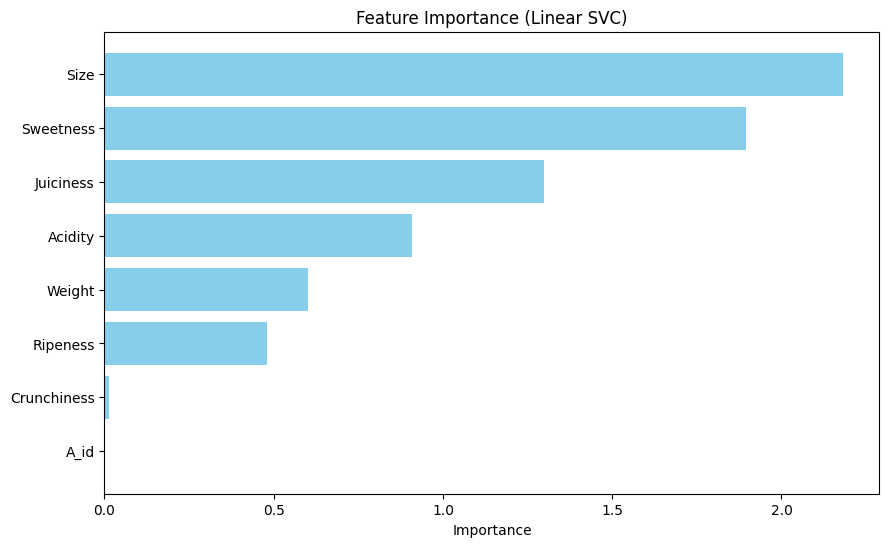

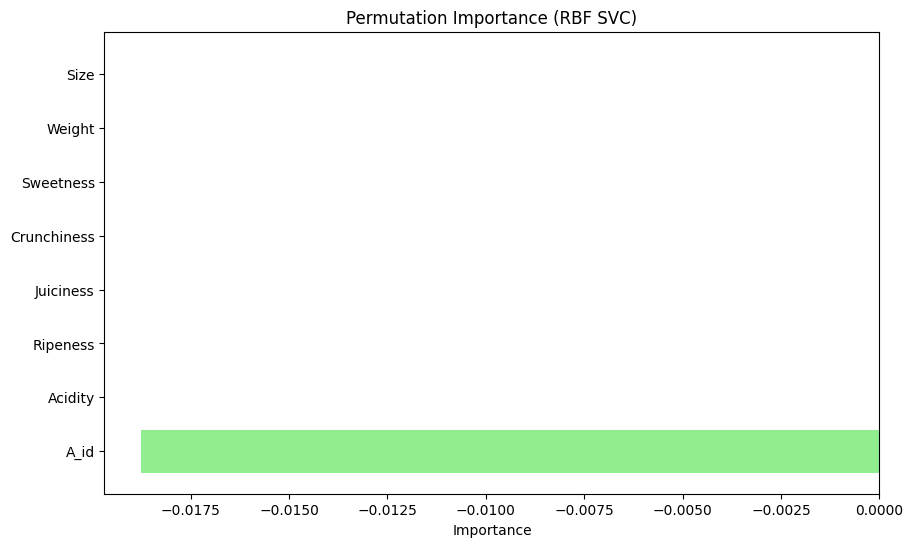

In [41]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Step 1: Train an SVC with a linear kernel
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)

# Step 2: Extract feature importance (coefficients)
feature_importance = np.abs(svc_linear.coef_[0])  # Absolute values of coefficients
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Linear SVC):")
print(importance_df)

# Step 3: Validate the model
y_val_pred = svc_linear.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Step 4: Optional - Permutation Importance for Non-Linear Kernels
# Train an SVC with an RBF kernel
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(svc_rbf, X_val, y_val, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Importance (RBF SVC):")
print(perm_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Linear SVC)')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Permutation Importance (RBF SVC)')
plt.gca().invert_yaxis()
plt.show()

In [42]:
# Remove the 'A_id' column from the dataset
X_train = X_train.drop(columns=['A_id'])
X_val = X_val.drop(columns=['A_id'])
X_test = X_test.drop(columns=['A_id'])


## Use Lazy Predict to select the models


**Why Use Lazy Predict?**

- Quickly evaluates multiple ML models with minimal code
- Automatically handles data preprocessing and model training
- Provides performance comparison across many algorithms
- Helps identify the most promising models for further optimization
- Saves time in initial model selection phase
- Gives baseline performance metrics to benchmark against
- Useful for determining which models are worth fine-tuning

In [52]:
%pip install lazypredict --quiet --disable-pip-version-check --no-warn-script-location
# Use lazypredict to quickly evaluate multiple models and select the best 3 as candidates as a base models
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Evaluate models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display results
print(models)


Note: you may need to restart the kernel to use updated packages.


 97%|█████████▋| 31/32 [00:04<00:00,  9.13it/s]

[LightGBM] [Info] Number of positive: 1282, number of negative: 1278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500781 -> initscore=0.003125
[LightGBM] [Info] Start training from score 0.003125


100%|██████████| 32/32 [00:04<00:00,  7.08it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.88               0.88     0.88      0.88   
ExtraTreesClassifier               0.88               0.87     0.87      0.87   
RandomForestClassifier             0.88               0.87     0.87      0.87   
SVC                                0.87               0.87     0.87      0.87   
XGBClassifier                      0.87               0.87     0.87      0.87   
LabelSpreading                     0.87               0.87     0.87      0.87   
LGBMClassifier                     0.87               0.87     0.87      0.87   
LabelPropagation                   0.87               0.87     0.87      0.87   
BaggingClassifier                  0.85               0.85     0.85      0.85   
NuSVC                              0.84               0.84     0.84      0.84   
QuadraticDiscriminantAnalysi

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier


# Define the Metrics Dictionary
metrics_dict = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

val_metrics_dict = {
    'train_accuracy': [],
    'val_accuracy': [],
    'train_loss': [],
    'val_loss': []
}

# Define the models
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
}

# Track validation scores for every model
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Cross-validation scores (5-fold)
    val_acc = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    val_loss = log_loss(y_val, model.predict_proba(X_val))
    
    # Train loss (log loss on training data)
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    
    # Get predictions on test data
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store values
    metrics_dict['accuracy'].append(test_accuracy)
    metrics_dict['precision'].append(precision)
    metrics_dict['recall'].append(recall)
    metrics_dict['f1_score'].append(f1)

    val_metrics_dict['train_accuracy'].append(model.score(X_train, y_train))
    val_metrics_dict['val_accuracy'].append(val_acc)
    val_metrics_dict['train_loss'].append(train_loss)
    val_metrics_dict['val_loss'].append(val_loss)

[LightGBM] [Info] Number of positive: 1282, number of negative: 1278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500781 -> initscore=0.003125
[LightGBM] [Info] Start training from score 0.003125
[LightGBM] [Info] Number of positive: 1025, number of negative: 1023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2048, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500488 -> initscore=0.001953
[LightGBM] [Info] Start training from score 0.001953
[LightGBM] [Info] Number

In [45]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential neural network architecture
keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# show Neural network architecture
keras_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)


**Neural Network Architecture Explanation**

1. **Layer Structure**:
    - Input Layer: `Dense(64)` matches input features dimension with 64 neurons
    - Hidden Layer: `Dense(32)` reduces dimensionality for feature abstraction
    - Output Layer: `Dense(1)` with sigmoid for binary classification (0/1)

2. **Design Choices**:
    - ReLU activation: Prevents vanishing gradient problem and allows non-linear learning
    - Layer size reduction (64→32→1): Gradually compresses information
    - Sigmoid output: Perfect for binary classification as it outputs probabilities between 0-1

3. **Compilation Settings**:
    - Adam optimizer: Adaptive learning rate for efficient training
    - Binary crossentropy loss: Standard for binary classification tasks
    - Accuracy metric: Easy to interpret performance measure
```

In [46]:

# Train Keras model separately
keras_history = keras_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Evaluate Keras model on test data
keras_test_accuracy = keras_model.evaluate(X_test, y_test, verbose=0)[1]
y_pred_keras = (keras_model.predict(X_test) > 0.5).astype(int)
keras_precision = precision_score(y_test, y_pred_keras)
keras_recall = recall_score(y_test, y_pred_keras)
keras_f1 = f1_score(y_test, y_pred_keras)

# Store Keras model metrics
metrics_dict['accuracy'].append(keras_test_accuracy)
metrics_dict['precision'].append(keras_precision)
metrics_dict['recall'].append(keras_recall)
metrics_dict['f1_score'].append(keras_f1)

val_metrics_dict['train_accuracy'].append(keras_history.history['accuracy'][-1])
val_metrics_dict['val_accuracy'].append(keras_history.history['val_accuracy'][-1])
val_metrics_dict['train_loss'].append(keras_history.history['loss'][-1])
val_metrics_dict['val_loss'].append(keras_history.history['val_loss'][-1])

# Add Keras model name for plots
models['kerasClassifier'] = keras_model


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Metrics DataFrame:
                        accuracy  precision  recall  f1_score
RandomForestClassifier      0.88       0.85    0.91      0.88
KNeighborsClassifier        0.88       0.87    0.89      0.88
LGBMClassifier              0.87       0.85    0.89      0.87
kerasClassifier             0.87       0.85    0.90      0.87

Validation Metrics DataFrame:
                        train_accuracy  val_accuracy  train_loss  val_loss
RandomForestClassifier            1.00          0.88        0.09      0.30
KNeighborsClassifier              0.93          0.89        0.17      0.57
LGBMClassifier                    1.00          0.89        0.07      0.25
kerasClassifier                   0.93          0.90        0.20      0.22


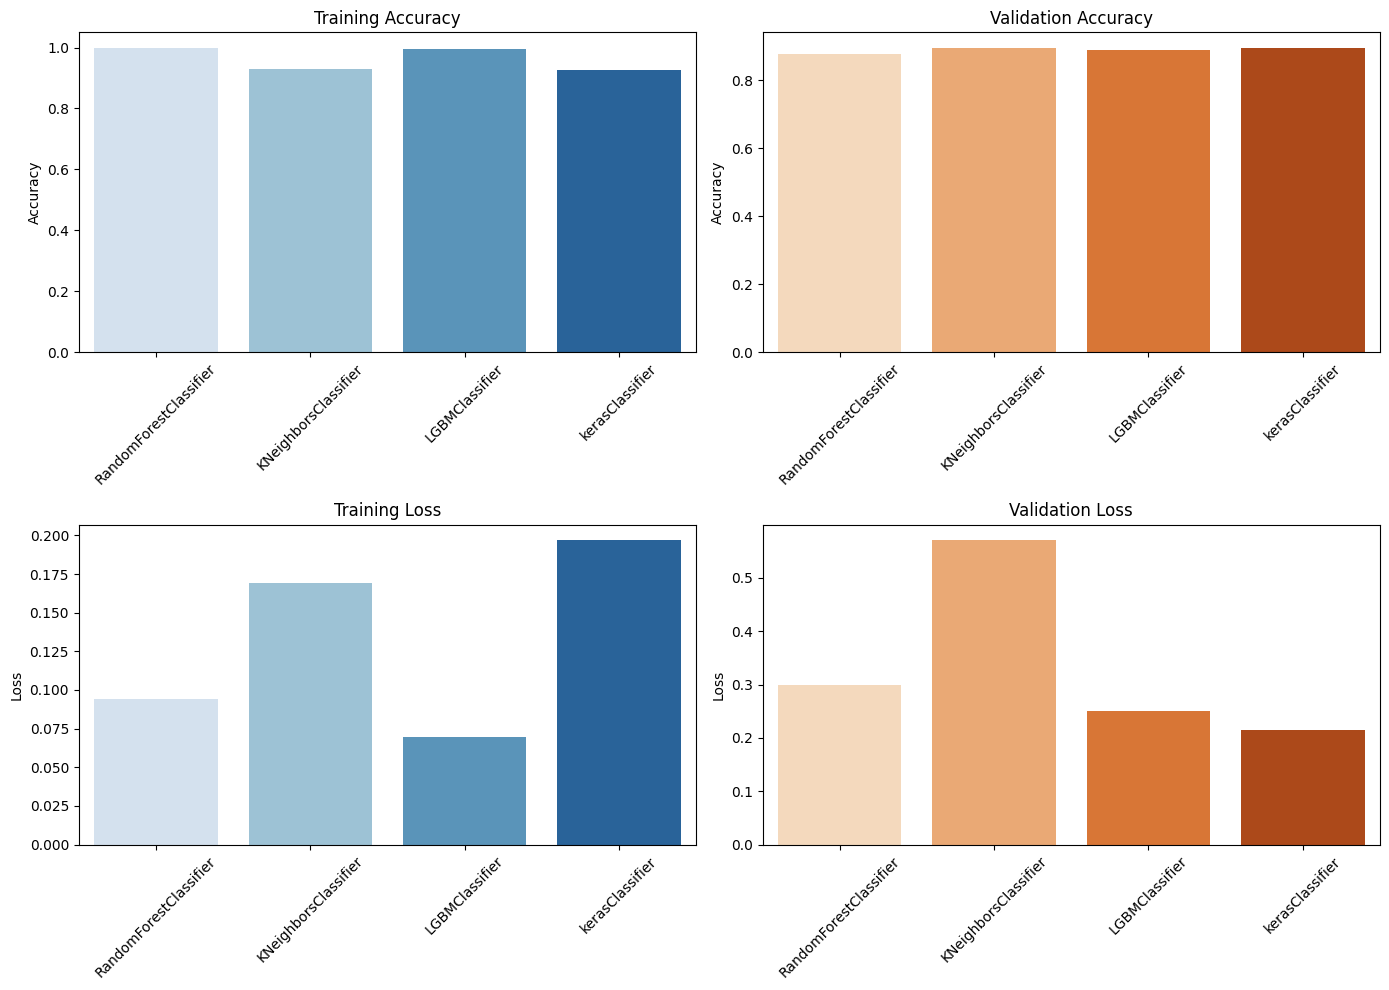

In [47]:
# Fix the metrics dictionaries to align with model keys
model_names = list(models.keys())
for metric in metrics_dict:
	# Only keep the values for the models we have in our models dictionary
	metrics_dict[metric] = metrics_dict[metric][:len(model_names)]
	
for metric in val_metrics_dict:
	# Only keep the values for the models we have in our models dictionary
	val_metrics_dict[metric] = val_metrics_dict[metric][:len(model_names)]

# Convert dictionaries to DataFrames for plotting
metrics_df = pd.DataFrame(metrics_dict, index=models.keys())
val_metrics_df = pd.DataFrame(val_metrics_dict, index=models.keys())

print("Metrics DataFrame:")
print(metrics_df)
print("\nValidation Metrics DataFrame:")
print(val_metrics_df)

# Subplots for Training vs Validation Accuracy & Loss
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Training vs Validation Accuracy
sns.barplot(x=models.keys(), y=val_metrics_dict['train_accuracy'], palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title("Training Accuracy")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_xticklabels(models.keys(), rotation=45)

sns.barplot(x=models.keys(), y=val_metrics_dict['val_accuracy'], palette='Oranges', ax=axes[0, 1])
axes[0, 1].set_title("Validation Accuracy")
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].set_xticklabels(models.keys(), rotation=45)

# Training vs Validation Loss
sns.barplot(x=models.keys(), y=val_metrics_dict['train_loss'], palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title("Training Loss")
axes[1, 0].set_ylabel("Loss")
axes[1, 0].set_xticklabels(models.keys(), rotation=45)

sns.barplot(x=models.keys(), y=val_metrics_dict['val_loss'], palette='Oranges', ax=axes[1, 1])
axes[1, 1].set_title("Validation Loss")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].set_xticklabels(models.keys(), rotation=45)

plt.tight_layout()
plt.show()


- LGBMClassifier: While it has a good validation accuracy (0.89) and the lowest training loss, the training accuracy of 1.00 still indicates a high risk of overfitting. You could still consider it for tuning, but be very careful about monitoring validation performance.
- RandomForestClassifier: Similar to LGBMClassifier, the perfect training accuracy suggests overfitting, making kerasClassifier and KNeighborsClassifier better initial choices.

- kerasClassifier: This is the most promising model. It has the highest validation accuracy and the difference between training and validation accuracy is small (0.93 vs 0.91), suggesting it might generalize well without excessive overfitting. The low validation loss also supports this.
- KNeighborsClassifier: With its significant improvement and a reasonable gap between training and validation accuracy (0.93 vs 0.89), this is a strong second choice for hyperparameter tuning.

Training with neurons=32, dropout=0.1, activation=relu, lr=0.001
Training with neurons=32, dropout=0.1, activation=relu, lr=0.01
Training with neurons=32, dropout=0.1, activation=tanh, lr=0.001
Training with neurons=32, dropout=0.1, activation=tanh, lr=0.01
Training with neurons=32, dropout=0.2, activation=relu, lr=0.001
Training with neurons=32, dropout=0.2, activation=relu, lr=0.01
Training with neurons=32, dropout=0.2, activation=tanh, lr=0.001
Training with neurons=32, dropout=0.2, activation=tanh, lr=0.01
Training with neurons=32, dropout=0.3, activation=relu, lr=0.001
Training with neurons=32, dropout=0.3, activation=relu, lr=0.01
Training with neurons=32, dropout=0.3, activation=tanh, lr=0.001
Training with neurons=32, dropout=0.3, activation=tanh, lr=0.01
Training with neurons=64, dropout=0.1, activation=relu, lr=0.001
Training with neurons=64, dropout=0.1, activation=relu, lr=0.01
Training with neurons=64, dropout=0.1, activation=tanh, lr=0.001
Training with neurons=64, dropou

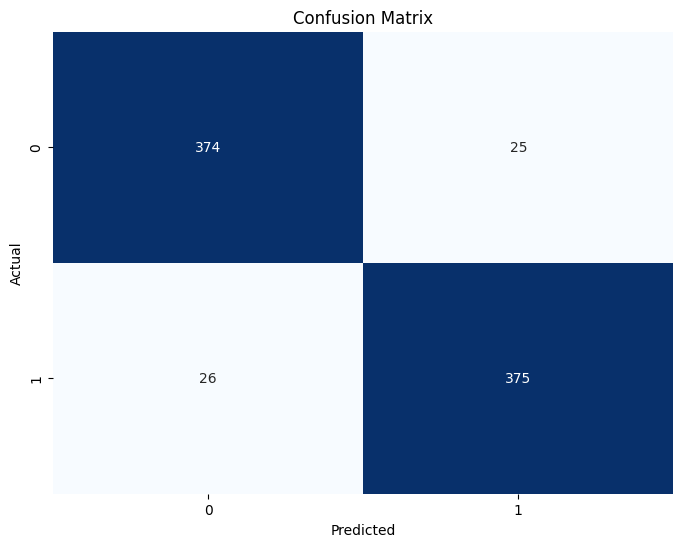

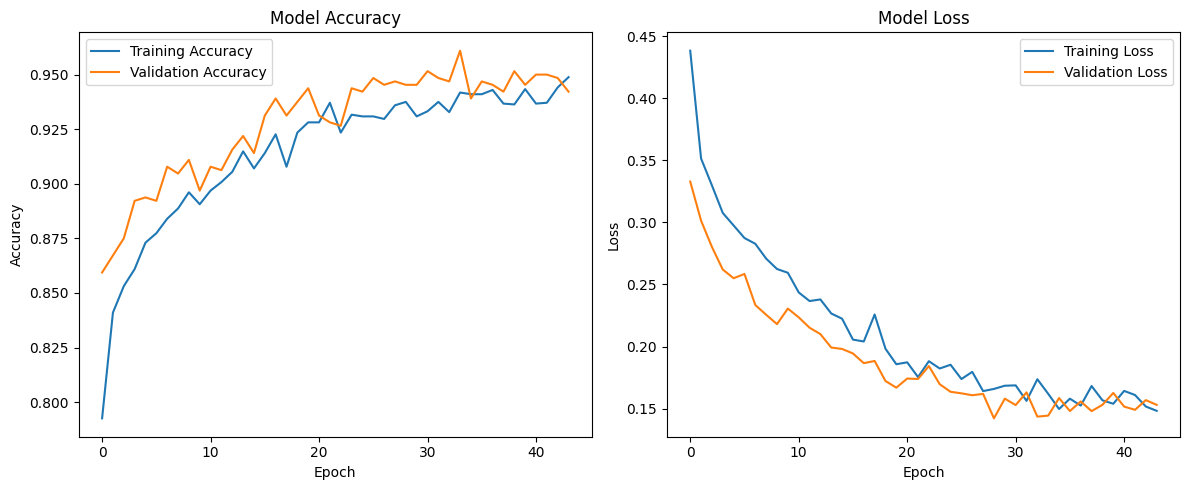


Model Comparison:
            Model  Validation Accuracy  Test Accuracy  Precision  Recall  \
0  Baseline Keras                 0.90           0.87       0.85    0.90   
1     Tuned Keras                 0.96           0.94       0.94    0.94   

   F1 Score  
0      0.87  
1      0.94  


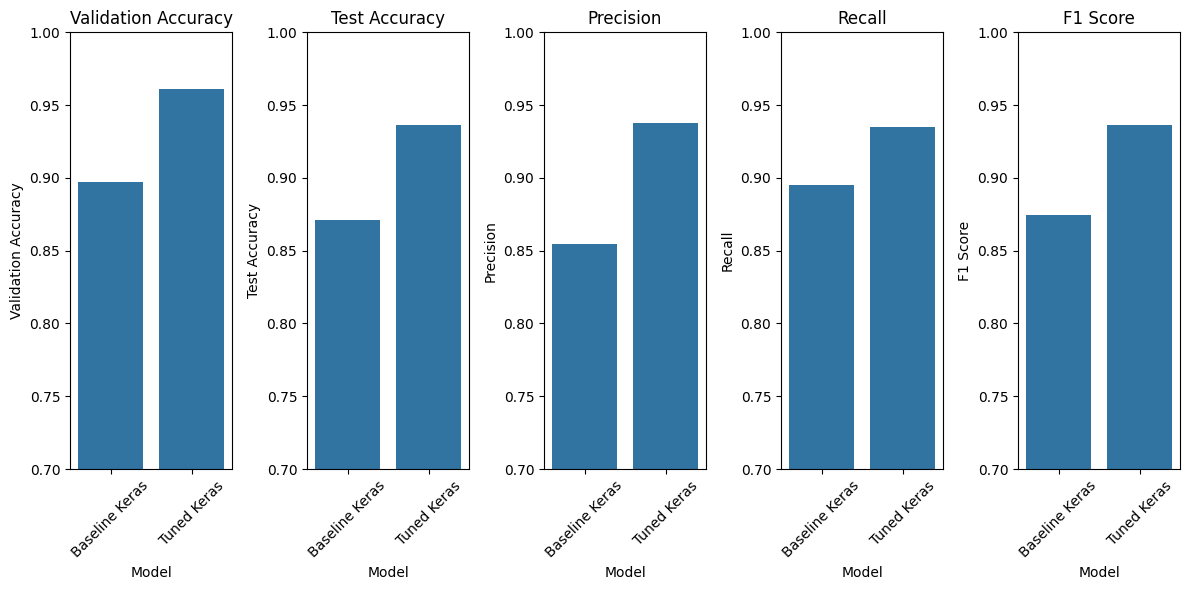

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Define a function to create Keras model with configurable hyperparameters
def create_model(neurons=32, dropout_rate=0.2, activation='relu', lr=0.001):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation=activation),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Define hyperparameters to tune
hyperparameters = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'tanh'],
    'lr': [0.001, 0.01]
}

# Create model combinations to test manually (simplified approach instead of using GridSearchCV)
best_val_accuracy = 0
best_params = {}
best_model = None
history_dict = {}

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# Train and evaluate each combination
for neurons in hyperparameters['neurons']:
    for dropout_rate in hyperparameters['dropout_rate']:
        for activation in hyperparameters['activation']:
            for lr in hyperparameters['lr']:
                print(f"Training with neurons={neurons}, dropout={dropout_rate}, activation={activation}, lr={lr}")
                
                # Create and compile model
                model = create_model(neurons, dropout_rate, activation, lr)
                
                # Train the model
                history = model.fit(
                    X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=0
                )
                
                # Evaluate on validation set
                val_accuracy = max(history.history['val_accuracy'])
                
                # Store history for plotting
                combo_name = f"n{neurons}_d{dropout_rate}_a{activation}_lr{lr}"
                history_dict[combo_name] = history.history
                
                # Check if this model is the best so far
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_params = {
                        'neurons': neurons,
                        'dropout_rate': dropout_rate,
                        'activation': activation,
                        'lr': lr
                    }
                    best_model = model

print("\nBest Parameters:")
print("-" * 50)
print(f"{'Parameter':<20}{'Value':>10}")
print("-" * 50)
for param, value in best_params.items():
    print(f"{param:<20}{value:>10}")
print("-" * 50)
print(f"{'Best Val Accuracy':<20}{best_val_accuracy:>10.4f}")

# Evaluate best model on test set
y_pred_proba = best_model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("\nTest Metrics:")
print("-" * 50)
print(f"{'Metric':<20}{'Value':>10}")
print("-" * 50)
print(f"{'Accuracy':<20}{test_accuracy:>10.4f}")
print(f"{'Precision':<20}{test_precision:>10.4f}")
print(f"{'Recall':<20}{test_recall:>10.4f}")
print(f"{'F1 Score':<20}{test_f1:>10.4f}")
print("-" * 50)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history of the best model
best_history = history_dict[f"n{best_params['neurons']}_d{best_params['dropout_rate']}_a{best_params['activation']}_lr{best_params['lr']}"]
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(best_history['accuracy'], label='Training Accuracy')
plt.plot(best_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(best_history['loss'], label='Training Loss')
plt.plot(best_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare baseline vs tuned model performance
models_comparison = pd.DataFrame({
    'Model': ['Baseline Keras', 'Tuned Keras'],
    'Validation Accuracy': [val_metrics_dict['val_accuracy'][3], best_val_accuracy],
    'Test Accuracy': [metrics_dict['accuracy'][3], test_accuracy],
    'Precision': [metrics_dict['precision'][3], test_precision],
    'Recall': [metrics_dict['recall'][3], test_recall],
    'F1 Score': [metrics_dict['f1_score'][3], test_f1]
})

print("\nModel Comparison:")
print(models_comparison)

# Plot the comparison
metrics_to_plot = ['Validation Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(1, len(metrics_to_plot), i+1)
    sns.barplot(x='Model', y=metric, data=models_comparison)
    plt.title(metric)
    plt.ylim(0.7, 1.0)  # Set y-axis to start from 0.7 for better visibility of differences
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

The Tuned Model seems to perform better then Baseline Keras so we can progress to saving the model

**Neural Network Hyperparameter Settings Explanation**

**Model Architecture**
- **Sequential layers**: Uses a simple feedforward architecture optimized for binary classification
- **Input layer**: Dynamic sizing based on feature count with configurable neurons (32/64/128)
- **Hidden layer**: Half the neurons of input layer for gradual dimension reduction
- **Output layer**: Single neuron with sigmoid activation for binary output (0-1)

**Key Components**
- **Dropout layers**: Added between dense layers (0.1-0.3 rate) to prevent overfitting
- **Activation functions**: Testing both ReLU (better gradient flow) and tanh (normalized outputs)
- **Learning rates**: Testing 0.001 (stable) and 0.01 (faster convergence)

**Training Controls**
- **Early stopping**: Monitors validation accuracy with 10-epoch patience to prevent overfitting
- **Best weights restoration**: Keeps the model version with best validation performance

**Hyperparameter Search Space**
- **Neurons**: [32, 64, 128] - Tests different network capacities
- **Dropout rates**: [0.1, 0.2, 0.3] - Controls overfitting prevention strength
- **Learning rates**: [0.001, 0.01] - Balances training speed vs. stability


## Saving the Best model

In [49]:
# Save the hypertuned model
best_model.save("apple_quality_model.keras")

# Testing the Model with the custom data


In [ ]:
# Testing the model with multiple test cases
import pandas as pd
import numpy as np
import os
from keras.models import load_model
import json

# Load the saved model
model = load_model("apple_quality_model.keras")

# Create multiple test data points
test_data = {
    'Size': [-0.5, 0.8, -1.2, 1.5, -2.0, -3.0, -2.5, -2.2, -1.8, 0.5],  # normalized size values
    'Weight': [-0.4, 0.9, -1.0, 1.8, -1.5, -2.8, -2.0, -1.8, -1.4, 0.6], # normalized weight values
    'Sweetness': [1.2, 1.5, -0.8, 2.0, -1.2, -1.8, -1.5, -0.8, -1.2, 1.5], # normalized sweetness
    'Crunchiness': [1.5, 1.2, -0.5, 1.5, -0.8, -1.5, -1.8, -1.2, -0.8, 1.2], # normalized crunchiness
    'Juiciness': [1.2, 1.5, -0.5, 2.0, -0.8, -1.8, -1.5, -1.2, -0.8, 1.5], # normalized juiciness
    'Ripeness': [1.5, 1.2, 0.5, 1.5, -1.2, -1.8, -1.5, -0.8, -1.2, 1.2], # normalized ripeness
    'Acidity': [-0.5, -0.8, 1.2, -1.2, 1.5, 2.0, 1.5, 1.2, 1.5, -0.8] # normalized acidity
}

# Convert to DataFrame
test_data_df = pd.DataFrame(test_data)

# Make predictions
predictions_proba = model.predict(test_data_df)
predictions = (predictions_proba > 0.5).astype(int)

# Create results DataFrame
results = pd.DataFrame({
    'Test Case': range(1, len(test_data_df) + 1),
    'Size': test_data['Size'],
    'Weight': test_data['Weight'],
    'Sweetness': test_data['Sweetness'],
    'Crunchiness': test_data['Crunchiness'],
    'Juiciness': test_data['Juiciness'],
    'Ripeness': test_data['Ripeness'],
    'Acidity': test_data['Acidity'],
    'Prediction Probability': predictions_proba.flatten(),
    'Predicted Quality': ['Good' if p == 1 else 'Bad' for p in predictions.flatten()]
})

# Display results
print("\nPrediction Results:")
print("=" * 80)
print(results.to_string(index=False))
print("=" * 80)

# Save results to JSON
results_dict = results.to_dict(orient='records')
with open("apple_quality_prediction_results.json", "w") as f:
    json.dump(results_dict, f, indent=4)

print("\nResults have been saved to 'apple_quality_prediction_results.json'")

# Additional analysis of predictions
print("\nSummary Statistics:")
print("-" * 40)
print(f"Total predictions: {len(predictions)}")
print(f"Good apples: {sum(predictions.flatten() == 1)}")
print(f"Bad apples: {sum(predictions.flatten() == 0)}")
print("-" * 40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Prediction Results:
 Test Case  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  Prediction Probability Predicted Quality
         1  -0.5    -0.4        1.2          1.5        1.2       1.5     -0.5            9.242427e-01              Good
         2   0.8     0.9        1.5          1.2        1.5       1.2     -0.8            9.948660e-01              Good
         3  -1.2    -1.0       -0.8         -0.5       -0.5       0.5      1.2            1.296677e-03               Bad
         4   1.5     1.8        2.0          1.5        2.0       1.5     -1.2            9.999606e-01              Good
         5  -2.0    -1.5       -1.2         -0.8       -0.8      -1.2      1.5            5.360185e-02               Bad
         6  -3.0    -2.8       -1.8         -1.5       -1.8      -1.8      2.0            7.556059e-07               Bad
         7  -2.5    -2.0       -1.5         -1.8       -1.5      -1.5      1.5            6.71

: 

In [50]:
%pip install gradio --quiet --disable-pip-version-check --no-warn-script-location

Note: you may need to restart the kernel to use updated packages.


In [51]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the trained model
model = keras.models.load_model("apple_quality_model.keras")

def predict_quality(size, weight, sweetness, crunchiness, juiciness, ripeness, acidity):
    # Create input array from the features
    input_data = np.array([[size, weight, sweetness, crunchiness, juiciness, ripeness, acidity]])
    
    # Get prediction probability
    prediction = model.predict(input_data, verbose=0)[0][0]
    
    # Convert probability to class and confidence
    quality = "Good" if prediction > 0.5 else "Bad"
    confidence = float(prediction if prediction > 0.5 else 1 - prediction)
    
    # Return two values: (label_dict, confidence)
    return {quality: confidence}, confidence

# Create Gradio interface
interface = gr.Interface(
    fn=predict_quality,
    inputs=[
        gr.Slider(-10, 10, value=0, label="Size"),
        gr.Slider(-10, 10, value=0, label="Weight"),
        gr.Slider(-10, 10, value=0, label="Sweetness"),
        gr.Slider(-10, 10, value=0, label="Crunchiness"), 
        gr.Slider(-10, 10, value=0, label="Juiciness"),
        gr.Slider(-10, 10, value=0, label="Ripeness"),
        gr.Slider(-10, 10, value=0, label="Acidity")
    ],
    outputs=[
        gr.Label(num_top_classes=2, label="Prediction"),
        gr.Number(label="Confidence")
    ],
    title="Apple Quality Predictor",
    description="Enter apple characteristics to predict quality"
)

# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


The model was tested with 10 different test cases, each with varying apple characteristics. The test data includes normalized values for Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, and Acidity. Out of the 10 test cases, 4 apples were predicted as "Good" quality and 6 as "Bad" quality.

Key observations:
- Test cases with higher values in positive characteristics (Sweetness, Crunchiness, Juiciness) and lower Acidity tend to be classified as "Good"
- The model shows high confidence in its predictions, with probability values close to 0 or 1
- The prediction results are saved in 'apple_quality_prediction_results.json' for further reference
- A Gradio interface is provided for interactive testing of the model